In [106]:
import random as rd
import numpy as np
try:
    import matplotlib.pyplot as plt
except:
    print('Erro ao importar biblioteca  "matplotlib.pyplot"!')

In [107]:
crossover_rate = 1
mutation_rate = 0.8 

tamanhoTabuleiro = 8
pop_init = 20
def init_population(_mu:int = pop_init, n:int = tamanhoTabuleiro):          #função disponibilizada pelo professor para gerar a população inicial
    population = []                                                                 
    for i in range (_mu):
        population.append(rd.sample(range(n), n))
    return population

pop = init_population(pop_init, tamanhoTabuleiro)                           #cria a população inicial
print(pop)


[[7, 4, 1, 2, 0, 5, 3, 6], [0, 1, 6, 4, 7, 5, 2, 3], [0, 7, 4, 1, 6, 5, 2, 3], [3, 4, 1, 6, 7, 5, 2, 0], [0, 6, 5, 2, 4, 7, 3, 1], [4, 5, 6, 0, 7, 3, 1, 2], [1, 3, 7, 2, 5, 4, 6, 0], [1, 0, 7, 4, 6, 5, 2, 3], [4, 6, 0, 7, 5, 3, 2, 1], [1, 0, 6, 3, 2, 5, 7, 4], [0, 6, 5, 4, 7, 3, 1, 2], [7, 1, 5, 6, 3, 2, 0, 4], [1, 2, 3, 4, 5, 6, 7, 0], [0, 1, 3, 4, 2, 6, 7, 5], [6, 0, 5, 3, 1, 2, 7, 4], [2, 5, 7, 3, 4, 0, 6, 1], [4, 6, 5, 0, 1, 3, 2, 7], [6, 2, 0, 4, 3, 5, 1, 7], [1, 2, 7, 3, 5, 0, 4, 6], [3, 1, 7, 2, 5, 0, 6, 4]]


In [108]:
def fitness_nq(solution):                               #função disponibilizada pelo professor para avaliar o número de xeques de uma solução
    xeques = 0
    for i in range(0,len(solution)):
        for j in range(0,len(solution)):
            if i!=j:
                if i-solution[i] == j-solution[j] or i+solution[i] == j+solution[j]:
                    xeques+=1
    return xeques

In [109]:
fitness_nq([7, 4, 0, 5, 3, 1, 2, 6])

8

In [110]:
pop_fitness = [fitness_nq(each_solution) for each_solution in pop]                  #lista com o número de xeques de todas os indivíduos da população
print(pop_fitness)

[8, 12, 14, 14, 6, 10, 10, 12, 10, 8, 16, 16, 44, 16, 10, 10, 6, 10, 8, 6]


In [111]:
def selection(pop):
    #retorna entre 5 soluçoes aleatórias, as duas melhores
    pop_fitness = [fitness_nq(each_solution) for each_solution in pop]    # Mostra o número de xeques de toda a população
    candidatos = list()                                                   # Cria uma lista para armazenar os candidatos a serem pais
    posicao = list()                                                      # Cria uma lista para armazenar a posição desses pais na lista pop
    for c in range(0,5):                                                  # Laço responsável por escolher os 5 indivíduos aleatórios e os colocar na lista 'candidatos' e suas posições na lista 'posicao'
        n = rd.randint(0,len(pop_fitness)-1)
        while n in posicao:                                               # Garante que não haverá um mesmo individuo escolhido 2x
            n = rd.randint(0,len(pop_fitness)-1)
        candidatos.append(pop_fitness[n])                                   
        posicao.append(n)
    menor1 = menor2 = candidatos[0]                                       # Algoritmo para descobrir os 2 menores numeros de candidatos e suas posiçoes. Assume=se primeiramente que os 2 menores numeros são iguais ao primeiro candidato
    cont = pos1 = pos2 =  0
    for c in candidatos:                                                  # Varre a lista inteira 
        if c < menor1:                                                    # Caso c seja menor que o menor número, c passa a ser o menor número e 'pos1' guarda a posição dele
            menor1 = c
            pos1 = cont
        elif c <=menor2:                                                  # Caso c seja menor ou igual que o segundo menor número, c passa a ser ele e 'pos2' guarda a posição dele
            menor2 = c
            pos2 = cont
        cont=cont+1                                                       # Contador incrementa 1 no final. MUITO IMPORTANTE para saber a posição dos números
    pais = [pop[posicao[pos1]], pop[posicao[pos2]]]                       # Cria uma lista pais com os dois individuos selecionados
    return pais


In [112]:
#TESTANDO A FUNÇÃO ACIMA
pais_teste = selection(pop)
print(f'pais_teste = {pais_teste}')

pais_teste = [[0, 6, 5, 2, 4, 7, 3, 1], [4, 6, 0, 7, 5, 3, 2, 1]]


In [113]:
def crossover(pais, crossover_rate):
    '''Código disponibilizado pelo professor em .m
       Apenas adaptamos ele para .pynb         '''
    sizeGeno = np.size(pais, 1)                                 
    crianca = np.zeros((sizeGeno))                          
    offspring = np.array([crianca, crianca], np.int32)      #cria uma array para armazenar os 2 novos individuos
    pos = round(rd.randint(1,sizeGeno-1))
    offspring[0][0:pos] = pais[0][0:pos]                    #iguala os genes dos filhos aos pais até certa parte para manter a hereditariedade
    offspring[1][0:pos] = pais[1][0:pos]
    s1=s2=pos
    if rd.random()<crossover_rate:                          #permuta o restante dos genes
        for i in range(0, sizeGeno):                    
            check1=check2=0
            for j in range(pos):
                if pais[1][i] == offspring[0][j]:
                        check1 = 1
                if pais[0][i] == offspring[1][j]:
                        check2 = 1
            if check1 == 0:
                offspring[0][s1] = pais[1][i]
                s1 = s1+1
            if check2 == 0:
                offspring[1][s2] = pais[0][i]
                s2 = s2+1    
    else:
        offspring = pais
    return offspring


In [114]:
#TESTANDO A FUNÇÃO ACIMA
offspring_teste = crossover(pais_teste, crossover_rate)
print(f'filhos teste: {offspring_teste}')

filhos teste: [[0 6 5 4 7 3 2 1]
 [4 6 0 5 2 7 3 1]]


In [115]:
def mutation(offspring, mutation_rate):
    if mutation_rate > rd.random():                                                 #analisa se vai ter ou não mutação
        for c in range(0,2):                                                        #processo se repete para os dois filhos
            n1 = rd.randint(0, tamanhoTabuleiro -1)                                 #sorteia duas posiçoes para serem trocadas
            n2 = rd.randint(0, tamanhoTabuleiro -1)
            while n1==n2:                                                           #garante que não sejam duas posições iguais
                n2 = rd.randint(0,tamanhoTabuleiro -1)
            temp = offspring[c][n1]                                                 #variavel auxiliar que armazena o valor daquela posição        
            offspring[c][n1] = offspring[c][n2]                                     #faz a troca de fato
            offspring[c][n2] = temp                                                     
    return offspring


In [116]:
#TESTANDO A FUNÇÃO ACIMA
offspring_teste = mutation(offspring_teste, mutation_rate)
print(f'filhos teste com mutacao: {offspring_teste}')

filhos teste com mutacao: [[7 6 5 4 0 3 2 1]
 [2 6 0 5 4 7 3 1]]


In [117]:
def replacement(offspring_new, pop):
    for c in range(0,2):                                                            #processo se repete para os dois filhos        
        pop_fitness = [fitness_nq(each_solution) for each_solution in pop]          #analisa todos os indivíduos da população
        maior = max(pop_fitness)                                                    #descobre qual é o pior indivíduo
        pos = pop_fitness.index(maior)                                              #descobre a posição do pior indivíduo
        del(pop[pos])                                                               #deleta o pior indivíduo
        pop.append(offspring[c])                                                    #adiciona o filho
    return pop
        



In [118]:
def coletaDados(bests, bests_medio, geracoes, pop_fitness, geracao_atual):
    bests.append(min(pop_fitness))                                                  #adiciona o melhor individuo na lista dos melhores
    geracoes.append(geracao_atual)                                                  #adiciona a geração atual na lista de gerações
    media = 0                                                                       
    for c in pop_fitness:
        media += c                                                                  #soma todos os fitness da geração atual
    media = media/len(pop_fitness)                                                  #calcula a media dos fitness
    bests_medio.append(media)                                                       #adiciona a media dos fitness na lista

In [119]:
try: 
    def grafico(x,y,x_title, y_title,title):
        figura = plt.figure(figsize=(20,4))                         #cria gráfico vazio
        figura.add_subplot(131)                                     #define o espaço em que o gráfico sera plotado
        plt.plot(x,y)                                               #plota o gráfico com as duas listas
        plt.xlabel(x_title)                                         #nomeia o eixo x
        plt.ylabel(y_title)                                         #nomeia o eixo y
        plt.title(title)                                            #nomeia o titulo
        plt.show()                                                  #mostra o gráfico
except:
    print('Erro ao criar função "def grafico(geracoes,bests):"!')

Menor número de cheques no início: 6
População final: [[7, 4, 1, 2, 0, 5, 3, 6], [0, 6, 5, 2, 4, 7, 3, 1], [1, 0, 6, 3, 2, 5, 7, 4], [4, 6, 5, 0, 1, 3, 2, 7], [1, 2, 7, 3, 5, 0, 4, 6], [3, 1, 7, 2, 5, 0, 6, 4], array([6, 3, 5, 2, 4, 7, 0, 1]), array([1, 7, 4, 2, 0, 5, 3, 6]), array([7, 1, 2, 3, 5, 0, 4, 6]), array([7, 2, 0, 6, 3, 1, 5, 4]), array([1, 7, 5, 3, 2, 0, 4, 6]), array([4, 7, 1, 2, 0, 5, 3, 6]), array([3, 6, 5, 2, 1, 7, 0, 4]), array([1, 3, 7, 4, 2, 0, 5, 6]), array([5, 4, 1, 3, 2, 7, 0, 6]), array([1, 7, 4, 2, 0, 6, 3, 5]), array([7, 5, 2, 3, 1, 0, 4, 6]), array([3, 6, 5, 2, 1, 7, 4, 0]), array([1, 7, 4, 2, 6, 0, 3, 5]), array([3, 7, 4, 2, 0, 6, 1, 5])]
Numero de iteraçoes: 10
Menor numero de cheques no final = 0
Melhor solução: [3 7 4 2 0 6 1 5]


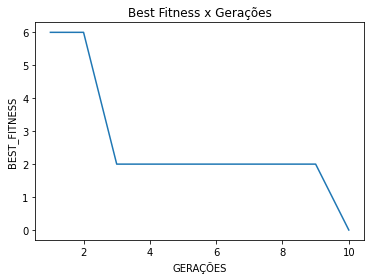

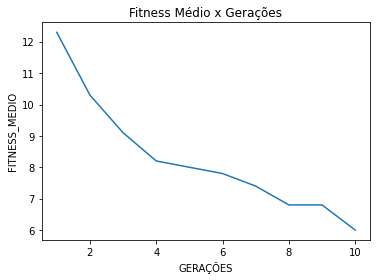

In [120]:
#ALGORITMO GENETICO COMPLETO

#listas de informações para os gráficos
bests = list()
bests_medio = list()
geracoes = list()

best = min(pop_fitness)                                                         #melhor indivíduo da população inicial
print(f'Menor número de cheques no início: {best}')
i = 1                                                                           #contador de gerações
coletaDados(bests, bests_medio, geracoes, pop_fitness, i)                       
while best!=0 and i<100:                                                        #laço ocorre 100 vezes ou até achar alguma solução perfeita
    pais = selection(pop)                                                       #seleciona os pais que procriarão
    offspring = crossover(pais, crossover_rate)                                 #gera 2 novos indivíduos
    offspring_new = mutation(offspring, mutation_rate)                          #modifica esses 2 indivíduos caso tenha mutação
    pop = replacement(offspring_new, pop)                                       #remove os 2 piores indíviduos da população e adiciona os 2 novos
    pop_fitness = [fitness_nq(each_solution) for each_solution in pop]          #atualiza o número de xeques da nova população
    best = min(pop_fitness)                                                     #armazena o menor número de xeques em 'best'
    i = i+1                                                                     #incrementa o contador
    coletaDados(bests, bests_medio, geracoes, pop_fitness, i) 
pos_best = pop_fitness.index(best)                                              #descobre a posição da solução com o menor número de xeques
print(f'População final: {pop}')
print(f'Numero de iteraçoes: {i}\nMenor numero de cheques no final = {best}')
print(f'Melhor solução: {pop[pos_best]}')
try:
    grafico(geracoes,bests, 'GERAÇÕES', 'BEST_FITNESS', 'Best Fitness x Gerações')
    grafico(geracoes,bests_medio, 'GERAÇÕES', 'FITNESS_MEDIO', 'Fitness Médio x Gerações')
except:
    print('Erro ao gerar gráfico!')
    
